## Leer los datos

In [2]:
import pandas as pd

e = pd.read_csv('laps.csv')

print(e.shape)
e.head()

(100, 1)


,Lap
0,00:02:10
1,00:00:49
2,00:00:50
3,00:00:33
4,00:04:20


## Dar formato a los minutos (e.g. 00:00:30 -> 0.5 minutos)

In [3]:
ftr = [3600,60,1]

lap_minutes = []
for entrada in e['Lap']:
    lap_minutes.append(sum([a*b for a,b in zip(ftr, map(int,entrada.strip().split(':')))])/60)

data = pd.DataFrame()
data['Minutes'] = lap_minutes
data.to_csv('datos_sim.csv')

## Histograma

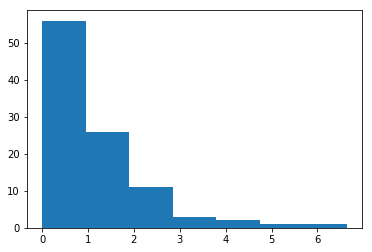

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

freq, bins, _ = plt.hist(data['Minutes'], bins=7)

## Media muestral

In [5]:
data['Minutes'].mean()

1.2241666666666668

## Intervalos

In [6]:
tabla = pd.DataFrame()

intervalos = []

for i in range(1, 8):
    int = '{0: > .3f} - {1: > .3f}'.format(bins[i-1], bins[i])
    intervalos.append(int)
    
tabla['Intervalos de llegada'] = intervalos
tabla

,Intervalos de llegada
0,0.000 - 0.948
1,0.948 - 1.895
2,1.895 - 2.843
3,2.843 - 3.790
4,3.790 - 4.738
5,4.738 - 5.686
6,5.686 - 6.633


## Frecuencia observada

In [7]:
tabla['Frecuencia observada'] = freq
tabla

,Intervalos de llegada,Frecuencia observada
0,0.000 - 0.948,56.0
1,0.948 - 1.895,26.0
2,1.895 - 2.843,11.0
3,2.843 - 3.790,3.0
4,3.790 - 4.738,2.0
5,4.738 - 5.686,1.0
6,5.686 - 6.633,1.0


## Probabilidad de ocurrencia

In [8]:
from scipy.stats import expon

probs = []
for i in range(1,7):
    cdf = round(expon.cdf(bins[i]) - expon.cdf(bins[i-1]), 4)
    probs.append(cdf)
    
probs.append(1-sum(probs))

tabla['Probabilidad de ocurrencia'] = probs
tabla

,Intervalos de llegada,Frecuencia observada,Probabilidad de ocurrencia
0,0.000 - 0.948,56.0,0.6123
1,0.948 - 1.895,26.0,0.2374
2,1.895 - 2.843,11.0,0.0920
3,2.843 - 3.790,3.0,0.0357
4,3.790 - 4.738,2.0,0.0138
5,4.738 - 5.686,1.0,0.0054
6,5.686 - 6.633,1.0,0.0034


## Frecuencia esperada

In [9]:
tabla['Frecuencia esperada'] = [round(100*p, 4) for p in probs]
tabla 

,Intervalos de llegada,Frecuencia observada,Probabilidad de ocurrencia,Frecuencia esperada
0,0.000 - 0.948,56.0,0.6123,61.23
1,0.948 - 1.895,26.0,0.2374,23.74
2,1.895 - 2.843,11.0,0.0920,9.20
3,2.843 - 3.790,3.0,0.0357,3.57
4,3.790 - 4.738,2.0,0.0138,1.38
5,4.738 - 5.686,1.0,0.0054,0.54
6,5.686 - 6.633,1.0,0.0034,0.34


## Agrupación (>=5)

In [10]:
tabla['Agrupada (>=5)'] = ''
tabla.loc[6, 'Agrupada (>=5)'] = sum(tabla['Frecuencia esperada'][[3, 4, 5, 6]])
tabla

,Intervalos de llegada,Frecuencia observada,Probabilidad de ocurrencia,Frecuencia esperada,Agrupada (>=5)
0,0.000 - 0.948,56.0,0.6123,61.23,
1,0.948 - 1.895,26.0,0.2374,23.74,
2,1.895 - 2.843,11.0,0.0920,9.20,
3,2.843 - 3.790,3.0,0.0357,3.57,
4,3.790 - 4.738,2.0,0.0138,1.38,
5,4.738 - 5.686,1.0,0.0054,0.54,
6,5.686 - 6.633,1.0,0.0034,0.34,5.83


## Chi cuadrada calculada

In [11]:
o = list(tabla['Frecuencia observada'][[0,1,2]])
o.insert(0,sum(tabla['Frecuencia observada'][[3,4,5,6]]))
e = list(tabla['Frecuencia esperada'][[0,1,2]])
e.insert(0,tabla['Agrupada (>=5)'][6])


chi = []
for i in range(0,4):
    chi.append(((o[i] - e[i])**2)/e[i])

chi_calculada = sum(chi)

chi.insert(3, '')
chi.insert(4, '')
chi.insert(5, '')

tabla['Chi cuadrada'] = chi

tabla

,Intervalos de llegada,Frecuencia observada,Probabilidad de ocurrencia,Frecuencia esperada,Agrupada (>=5),Chi cuadrada
0,0.000 - 0.948,56.0,0.6123,61.23,,0.234803
1,0.948 - 1.895,26.0,0.2374,23.74,,0.446724
2,1.895 - 2.843,11.0,0.0920,9.20,,0.215147
3,2.843 - 3.790,3.0,0.0357,3.57,,
4,3.790 - 4.738,2.0,0.0138,1.38,,
5,4.738 - 5.686,1.0,0.0054,0.54,,
6,5.686 - 6.633,1.0,0.0034,0.34,5.83,0.352174


In [12]:
chi_calculada

1.2488479161547124

## Chi cuadrada inversa

In [13]:
from scipy.stats import chi2

chi2.isf(.05, 2)

5.9914645471079817